# LGBM

## 0) Importing Packages & Data

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
batter = pd.read_csv("https://raw.githubusercontent.com/njj06135/Baseball_ChilliShrimp/master/data/batter_feature_selection.csv")
pitcher = pd.read_csv("https://raw.githubusercontent.com/njj06135/Baseball_ChilliShrimp/master/data/pitcher_feature_selection.csv")

## 1) Batter

### 1-1) LGBM  Modeling

In [14]:
from sklearn.model_selection import train_test_split

X = batter.drop(["Unnamed: 0","XR"], axis = 1)
Y = batter['XR']

In [15]:
X['T_ID'] = X['T_ID'].astype('category')
X['P_ID'] = X['P_ID'].astype('category')
X['BAT_ORDER'] = X['BAT_ORDER'].astype('category')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)

In [17]:
lgbm = LGBMRegressor(n_estimators=200, random_state=99)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [19]:
params = {'max_depth': [10, 15, 20, 25, 30],
          'min_child_samples': [20, 40, 60, 80, 100],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='MSE',
         eval_set=[(x_train, y_train), (x_test, y_test)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[76]	valid_0's l2: 0.189247	valid_0's l2: 0.189247	valid_1's l2: 0.386869	valid_1's l2: 0.386869
[77]	valid_0's l2: 0.188495	valid_0's l2: 0.188495	valid_1's l2: 0.386525	valid_1's l2: 0.386525
[78]	valid_0's l2: 0.187592	valid_0's l2: 0.187592	valid_1's l2: 0.386165	valid_1's l2: 0.386165
[79]	valid_0's l2: 0.186696	valid_0's l2: 0.186696	valid_1's l2: 0.385193	valid_1's l2: 0.385193
[80]	valid_0's l2: 0.185833	valid_0's l2: 0.185833	valid_1's l2: 0.385389	valid_1's l2: 0.385389
[81]	valid_0's l2: 0.184373	valid_0's l2: 0.184373	valid_1's l2: 0.384128	valid_1's l2: 0.384128
[82]	valid_0's l2: 0.182865	valid_0's l2: 0.182865	valid_1's l2: 0.383116	valid_1's l2: 0.383116
[83]	valid_0's l2: 0.182211	valid_0's l2: 0.182211	valid_1's l2: 0.382449	valid_1's l2: 0.382449
[84]	valid_0's l2: 0.181313	valid_0's l2: 0.181313	valid_1's l2: 0.382585	valid_1's l2: 0.382585
[85]	valid_0's l2: 0.180203	valid_0's l2: 0.180203	valid_1's l2: 0.381325	valid_1's l2: 0.3

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=200, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=99,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_child_samples': [20, 40, 60, 80, 100],
                         'subsample': [0.8, 1]},
 

In [20]:
print("최적 파라미터: ", grid.best_params_)
lgbm_mse = mean_squared_error(y_test, grid.predict(x_test))
print("MSE : {0:.4f}".format(lgbm_mse))

최적 파라미터:  {'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8}
MSE : 0.2818


In [21]:
lgbm = LGBMRegressor(max_depth=10, min_child_samples=20, subsample=0.8, n_estimators=200, random_state=99)
evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='MSE', eval_set=evals, verbose=True)

[1]	valid_0's l2: 29.377	valid_0's l2: 29.377
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 23.9956	valid_0's l2: 23.9956
[3]	valid_0's l2: 19.6625	valid_0's l2: 19.6625
[4]	valid_0's l2: 16.1118	valid_0's l2: 16.1118
[5]	valid_0's l2: 13.2345	valid_0's l2: 13.2345
[6]	valid_0's l2: 10.8755	valid_0's l2: 10.8755
[7]	valid_0's l2: 8.96123	valid_0's l2: 8.96123
[8]	valid_0's l2: 7.39835	valid_0's l2: 7.39835
[9]	valid_0's l2: 6.11885	valid_0's l2: 6.11885
[10]	valid_0's l2: 5.08133	valid_0's l2: 5.08133
[11]	valid_0's l2: 4.22264	valid_0's l2: 4.22264
[12]	valid_0's l2: 3.52685	valid_0's l2: 3.52685
[13]	valid_0's l2: 2.94736	valid_0's l2: 2.94736
[14]	valid_0's l2: 2.4796	valid_0's l2: 2.4796
[15]	valid_0's l2: 2.09759	valid_0's l2: 2.09759
[16]	valid_0's l2: 1.78413	valid_0's l2: 1.78413
[17]	valid_0's l2: 1.53116	valid_0's l2: 1.53116
[18]	valid_0's l2: 1.32453	valid_0's l2: 1.32453
[19]	valid_0's l2: 1.14986	valid_0's l2: 1.14986
[20]	valid_0's l2: 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [22]:
score = mean_squared_error(y_test, lgbm.predict(x_test))
print("MSE : {0:.4f}".format(score))

MSE : 0.2804


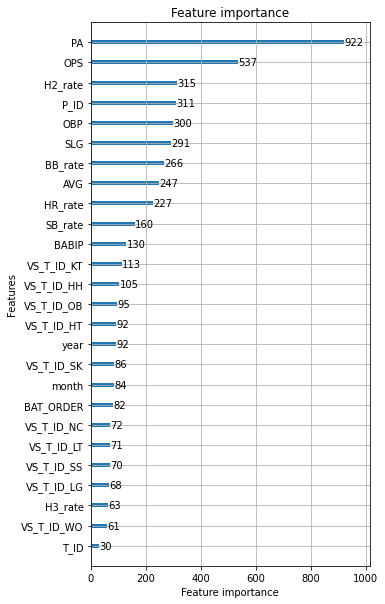

In [23]:
lgb.plot_importance(lgbm, figsize = (5,10))

### 1-2) Prediction

In [24]:
batter_pred = pd.read_csv("https://raw.githubusercontent.com/njj06135/Baseball_ChilliShrimp/master/data/batter_predict.csv")

In [25]:
batter_pred = batter_pred.drop(columns=['H_A_AWAY', 'H_A_HOME'])

In [26]:
batter_pred['T_ID'] = batter_pred['T_ID'].astype('category')
batter_pred['P_ID'] = batter_pred['P_ID'].astype('category')
batter_pred['BAT_ORDER'] = batter_pred['BAT_ORDER'].astype('category')

In [27]:
pred = lgbm.predict(batter_pred)

In [28]:
batter_pred['XR'] = pred

In [29]:
batter_pred.XR[batter_pred.XR < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
xr_by_t = batter_pred[['T_ID', 'XR']]

In [80]:
xr_by_t = xr_by_t.groupby(['T_ID']).sum()

In [81]:
xr_by_t.sort_values(by = 'XR', ascending=False)

,XR
T_ID,
HH,514.988005
NC,481.906164
SK,472.328650
WO,458.301749
LG,449.798723
HT,398.274006
LT,389.212909
OB,370.553938
KT,331.051703


In [86]:
medxr = (449.798723 + 398.274006)/2

## 2) Pitcher


### 2-1) LGBM Modeling

In [8]:
from sklearn.model_selection import train_test_split

In [32]:
pitcher = pitcher.drop(columns = ['Unnamed: 0', 'X', 'TB_SC_T', 'TB_SC_B', 'WLS_D', 'WLS_L', 'WLS_L', 'WLS_ND', 'WLS_S', 'WLS_W', 'START_CK', 'RELIEF_CK', 'CG_CK'])

In [33]:
X = pitcher.drop(columns = ['R'])
Y = pitcher['R']

In [53]:
Y

0        8
1        5
2        5
3        5
4       14
        ..
5299     8
5300     6
5301     3
5302     7
5303     1
Name: R, Length: 5304, dtype: int64

In [34]:
X

,BF,PA,BK,AVG,OBP,SLG,OPS,BABIP,H2_rate,H3_rate,HR_rate,T_ID,year,month,P_ID,VS_T_ID_HH,VS_T_ID_HT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_LT,VS_T_ID_NC,VS_T_ID_OB,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_WO
0,195,48,0,0.372093,0.437500,0.581395,1.018895,0.405660,0.187500,0.000000,0.125000,HH,2016,4,60757,0,0,0,1,0,2,3,0,0,2
1,48,8,0,0.500000,0.875000,0.500000,1.375000,0.368421,0.000000,0.000000,0.000000,HH,2016,4,60764,0,0,0,1,0,0,1,0,0,0
2,123,35,0,0.258065,0.323529,0.483871,0.807400,0.319295,0.125000,0.000000,0.250000,HH,2016,4,60768,0,0,0,0,0,0,1,0,1,0
3,181,45,0,0.225000,0.311111,0.275000,0.586111,0.273973,0.222222,0.000000,0.000000,HH,2016,4,63791,0,0,0,1,1,2,4,0,0,2
4,192,44,0,0.428571,0.534884,0.657143,1.192027,0.348045,0.133333,0.000000,0.133333,HH,2016,4,65764,0,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,152,38,0,0.200000,0.368421,0.300000,0.668421,0.333333,0.000000,0.000000,0.166667,WO,2020,7,68341,0,0,2,0,0,2,1,2,2,0
5300,293,77,1,0.293333,0.311688,0.373333,0.685022,0.279188,0.045455,0.045455,0.045455,WO,2020,7,69343,0,0,1,0,0,1,0,0,1,0
5301,24,7,0,0.600000,0.714286,0.800000,1.514286,0.352113,0.333333,0.000000,0.000000,WO,2020,7,69360,0,0,0,0,0,0,1,0,0,0
5302,70,20,0,0.529412,0.550000,0.588235,1.138235,0.471698,0.111111,0.000000,0.000000,WO,2020,7,69399,0,0,0,0,0,0,0,1,1,0


In [35]:
X['T_ID'] = X['T_ID'].astype('category')
X['P_ID'] = X['P_ID'].astype('category')

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)

In [37]:
lgbm = LGBMRegressor(n_estimators=200, random_state=99)

In [38]:
params = {'max_depth': [10, 15, 20, 25, 30],
          'min_child_samples': [20, 40, 60, 80, 100],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='MSE',
         eval_set=[(x_train, y_train), (x_test, y_test)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[123]	valid_0's l2: 1.58027	valid_0's l2: 1.58027	valid_1's l2: 4.39881	valid_1's l2: 4.39881
[124]	valid_0's l2: 1.57581	valid_0's l2: 1.57581	valid_1's l2: 4.40424	valid_1's l2: 4.40424
[125]	valid_0's l2: 1.57003	valid_0's l2: 1.57003	valid_1's l2: 4.40353	valid_1's l2: 4.40353
[126]	valid_0's l2: 1.56343	valid_0's l2: 1.56343	valid_1's l2: 4.40498	valid_1's l2: 4.40498
[127]	valid_0's l2: 1.55694	valid_0's l2: 1.55694	valid_1's l2: 4.4025	valid_1's l2: 4.4025
[128]	valid_0's l2: 1.5516	valid_0's l2: 1.5516	valid_1's l2: 4.40707	valid_1's l2: 4.40707
[129]	valid_0's l2: 1.54416	valid_0's l2: 1.54416	valid_1's l2: 4.40939	valid_1's l2: 4.40939
[130]	valid_0's l2: 1.53769	valid_0's l2: 1.53769	valid_1's l2: 4.41243	valid_1's l2: 4.41243
[131]	valid_0's l2: 1.53139	valid_0's l2: 1.53139	valid_1's l2: 4.41167	valid_1's l2: 4.41167
[132]	valid_0's l2: 1.52719	valid_0's l2: 1.52719	valid_1's l2: 4.41394	valid_1's l2: 4.41394
[133]	valid_0's l2: 1.52034	

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=200, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=99,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_child_samples': [20, 40, 60, 80, 100],
                         'subsample': [0.8, 1]},
 

In [39]:
print("최적 파라미터: ", grid.best_params_)
lgbm_mse = mean_squared_error(y_test, grid.predict(x_test))
print("MSE : {0:.4f}".format(lgbm_mse))

최적 파라미터:  {'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8}
MSE : 4.1146


In [40]:
lgbm = LGBMRegressor(max_depth=10, min_child_samples=20, subsample=0.8, n_estimators=200, random_state=99)
evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='MSE', eval_set=evals, verbose=True)

[1]	valid_0's l2: 27.8339	valid_0's l2: 27.8339
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 23.6133	valid_0's l2: 23.6133
[3]	valid_0's l2: 20.2029	valid_0's l2: 20.2029
[4]	valid_0's l2: 17.3108	valid_0's l2: 17.3108
[5]	valid_0's l2: 14.9473	valid_0's l2: 14.9473
[6]	valid_0's l2: 13.0582	valid_0's l2: 13.0582
[7]	valid_0's l2: 11.4873	valid_0's l2: 11.4873
[8]	valid_0's l2: 10.1786	valid_0's l2: 10.1786
[9]	valid_0's l2: 9.11647	valid_0's l2: 9.11647
[10]	valid_0's l2: 8.22707	valid_0's l2: 8.22707
[11]	valid_0's l2: 7.49245	valid_0's l2: 7.49245
[12]	valid_0's l2: 6.90239	valid_0's l2: 6.90239
[13]	valid_0's l2: 6.40821	valid_0's l2: 6.40821
[14]	valid_0's l2: 6.0323	valid_0's l2: 6.0323
[15]	valid_0's l2: 5.68996	valid_0's l2: 5.68996
[16]	valid_0's l2: 5.42249	valid_0's l2: 5.42249
[17]	valid_0's l2: 5.19925	valid_0's l2: 5.19925
[18]	valid_0's l2: 5.00212	valid_0's l2: 5.00212
[19]	valid_0's l2: 4.84871	valid_0's l2: 4.84871
[20]	valid_0's l2

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [41]:
score = mean_squared_error(y_test, lgbm.predict(x_test))
print("MSE : {0:.4f}".format(score))

MSE : 4.1146


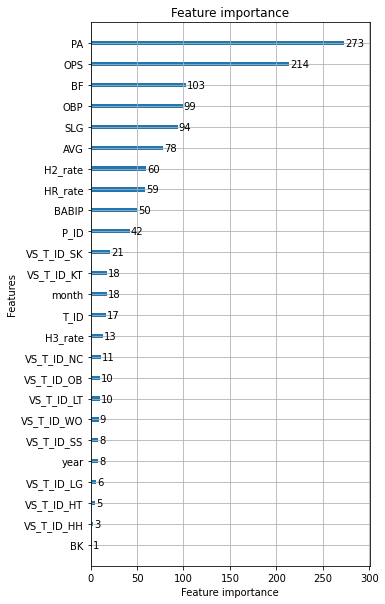

In [42]:
lgb.plot_importance(lgbm, figsize = (5,10))

### 2-2) Prediction

In [43]:
pitcher_pred = pd.read_csv("https://raw.githubusercontent.com/njj06135/Baseball_ChilliShrimp/master/data/pitcher_predict.csv")

In [44]:
pitcher_pred

,BF,PA,BK,AVG,OBP,SLG,OPS,BABIP,H2_rate,H3_rate,HR_rate,T_ID,year,month,P_ID,VS_T_ID_HH,VS_T_ID_HT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_LT,VS_T_ID_NC,VS_T_ID_OB,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_WO,GD_rate,H_A_AWAY,H_A_HOME
0,148.992248,40,0.0,0.266774,0.323613,0.387652,0.711265,0.316832,0.214286,0.000000,0.085714,KT,2020,7,50030,0,1,0,1,0,3,0,1,0,0,0.034884,1,5
1,238.387597,64,0.0,0.277889,0.333867,0.403805,0.737672,0.316832,0.214286,0.000000,0.085714,KT,2020,8,50030,3,2,0,2,0,2,3,4,2,5,0.034884,15,8
2,223.488372,60,0.0,0.276654,0.332728,0.402010,0.734738,0.316832,0.214286,0.000000,0.085714,KT,2020,9,50030,2,2,0,2,4,2,4,5,4,2,0.034884,12,15
3,197.414729,53,0.0,0.268452,0.325161,0.390090,0.715251,0.316832,0.214286,0.000000,0.085714,KT,2020,10,50030,2,2,0,5,3,0,4,3,2,3,0.034884,12,12
4,13.212121,4,0.0,0.000000,0.242424,0.000000,0.242424,0.400000,0.111111,0.111111,0.111111,KT,2020,7,50036,0,1,0,1,0,3,0,1,0,0,0.000000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,179.860000,46,0.0,0.456129,0.540429,0.699587,1.240016,0.316754,0.268293,0.000000,0.097561,SK,2020,10,79847,0,3,3,0,4,1,3,0,4,3,0.025000,8,13
916,43.333333,10,0.0,0.000000,0.020833,0.000000,0.020833,0.313274,0.142857,0.071429,0.000000,SS,2020,7,99445,2,2,0,0,0,1,0,0,0,1,0.000000,3,3
917,212.333333,49,0.0,0.208424,0.224915,0.267973,0.492888,0.313274,0.142857,0.071429,0.000000,SS,2020,8,99445,5,0,2,2,2,0,6,4,0,4,0.000000,14,11
918,199.333333,46,0.0,0.199815,0.216486,0.256905,0.473390,0.313274,0.142857,0.071429,0.000000,SS,2020,9,99445,3,4,4,2,2,4,4,2,0,2,0.000000,12,15


In [45]:
pitcher_pred = pitcher_pred.drop(columns = ['GD_rate', 'H_A_AWAY', 'H_A_HOME'])

In [46]:
pitcher_pred['T_ID'] = pitcher_pred['T_ID'].astype('category')
pitcher_pred['P_ID'] = pitcher_pred['P_ID'].astype('category')

In [48]:
pred = lgbm.predict(pitcher_pred)

In [49]:
pred[pred < 0] = 0

In [50]:
pitcher_pred['R'] = pred

In [59]:
r_by_t = pitcher[['T_ID','P_ID','PA', 'R']]

In [93]:
r_by_t = pitcher[['T_ID', 'R']]
r_by_t = r_by_t.groupby(['T_ID']).sum()
r_by_t.sort_values(by = 'R', ascending=False)
r_by_t = r_by_t * medxr / ((3367 + 3261)/2 )

In [96]:
rn = r_by_t ** 1.83

In [97]:
xrn = xr_by_t ** 1.83

In [104]:
rn

,R,WIN
T_ID,,
HH,75262.902385,75262.902385
HT,66184.683736,66184.683736
KT,76910.653709,76910.653709
LG,62421.551185,62421.551185
LT,70935.821408,70935.821408
NC,60473.888784,60473.888784
OB,54173.737095,54173.737095
SK,59168.226351,59168.226351
SS,75874.128261,75874.128261


In [105]:
rn['WIN'] = rn['R']
xrn['WIN'] = xrn['XR']

rn = rn[['WIN']]
xrn = xrn[['WIN']]

In [108]:
xrn / (xrn + rn)

,WIN
T_ID,
HH,0.549349
HT,0.464127
KT,0.347003
LG,0.534306
LT,0.436549
NC,0.573297
OB,0.481133
SK,0.569646
SS,0.283805
